In [1]:
#importing relevant libraries
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

In [2]:
tsla_data = yf.download('TSLA')
print(tsla_data)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-06-29    1.266667    1.666667    1.169333    1.592667    1.592667   
2010-06-30    1.719333    2.028000    1.553333    1.588667    1.588667   
2010-07-01    1.666667    1.728000    1.351333    1.464000    1.464000   
2010-07-02    1.533333    1.540000    1.247333    1.280000    1.280000   
2010-07-06    1.333333    1.333333    1.055333    1.074000    1.074000   
...                ...         ...         ...         ...         ...   
2024-02-05  184.259995  184.679993  175.009995  181.059998  181.059998   
2024-02-06  177.210007  186.490005  177.110001  185.100006  185.100006   
2024-02-07  188.179993  189.789993  182.679993  187.580002  187.580002   
2024-02-08  189.000000  191.619995  185.580002  189.559998  189.559998   
2024-02-09  190.179993  194.119995  189.479996  193.570007  193.570007   

               Volume  
Date         

In [3]:
tsla_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


<Axes: xlabel='Date'>

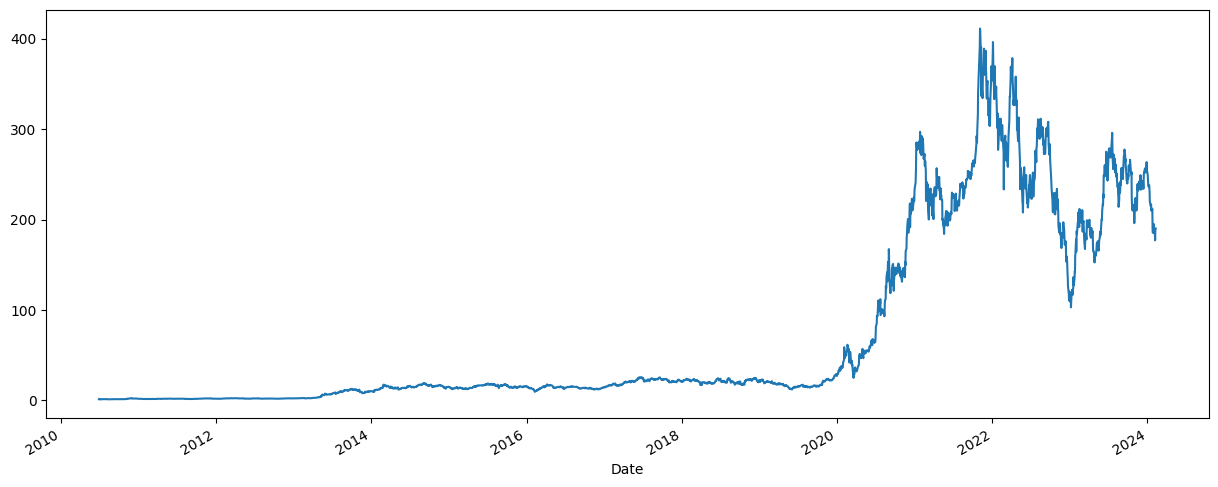

In [6]:
# simple moving average
tsla_data['Open'].plot(figsize = (15,6))

### this plot is having so much fluctuations so we aplly simple moving average

In [9]:
tsla_data['Open: 10 days rolling'] = tsla_data['Open'].rolling(window = 10, min_periods = 1).mean()

In [11]:
tsla_data['Open: 30 days rolling'] = tsla_data['Open'].rolling(window = 30, min_periods = 1).mean()

In [13]:
tsla_data['Open: 50 days rolling'] = tsla_data['Open'].rolling(window = 50, min_periods = 1).mean()

In [15]:
tsla_data['Open: 20 days rolling'] = tsla_data['Open'].rolling(window = 20, min_periods = 1).mean()

<Axes: xlabel='Date'>

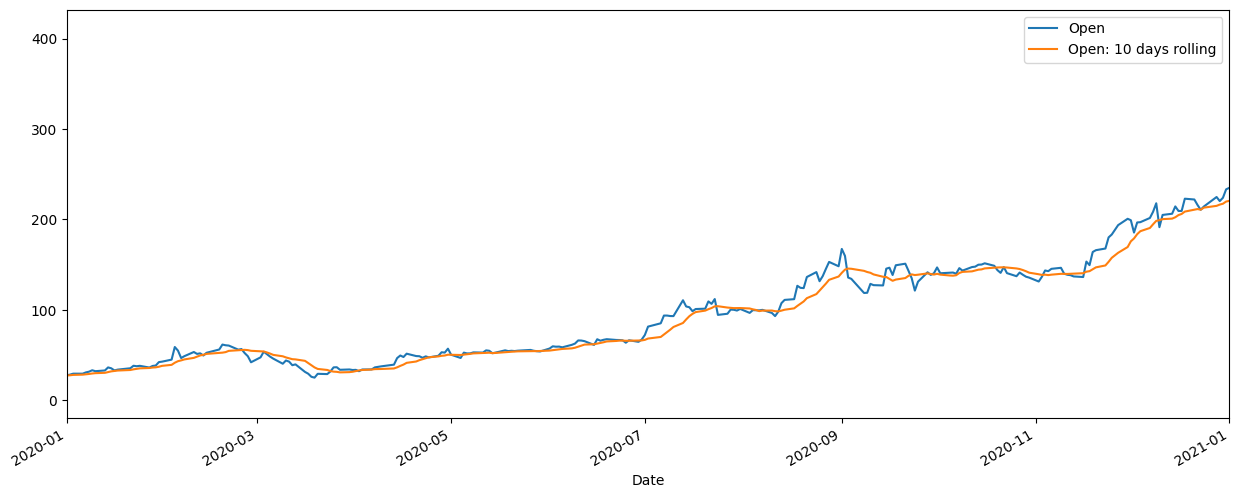

In [10]:
tsla_data[['Open','Open: 10 days rolling']].plot(xlim =['2020-01-01','2021-01-01'],figsize = (15,6))

<Axes: xlabel='Date'>

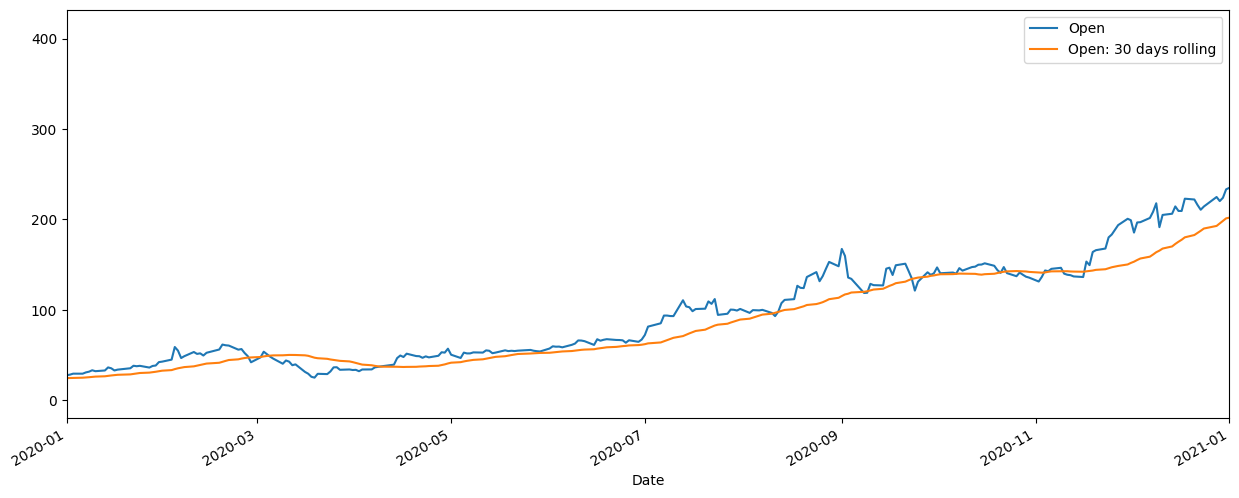

In [12]:
tsla_data[['Open','Open: 30 days rolling']].plot(xlim =['2020-01-01','2021-01-01'],figsize = (15,6))

<Axes: xlabel='Date'>

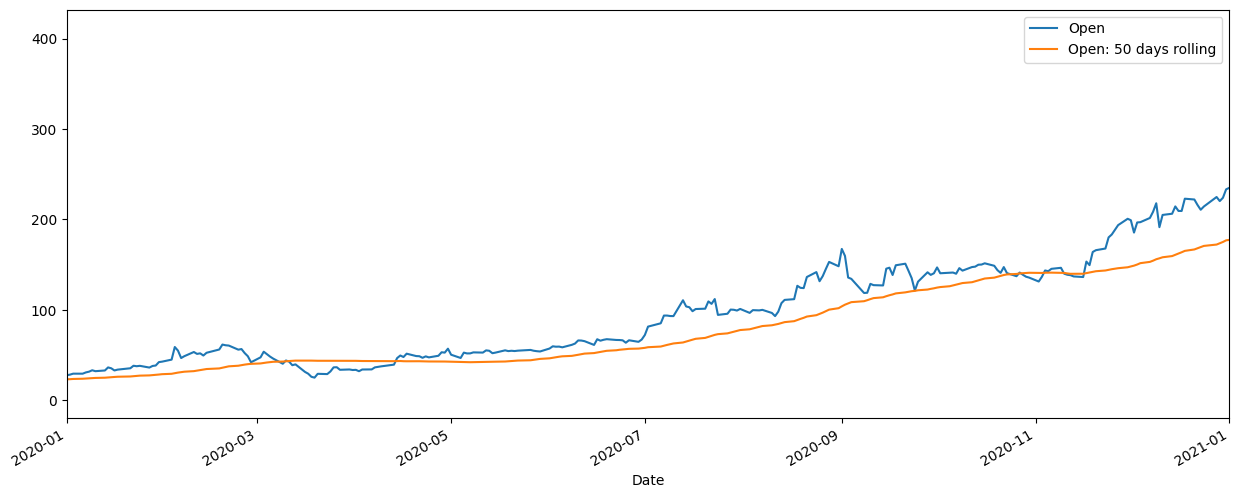

In [14]:
tsla_data[['Open','Open: 50 days rolling']].plot(xlim =['2020-01-01','2021-01-01'],figsize = (15,6))

<Axes: xlabel='Date'>

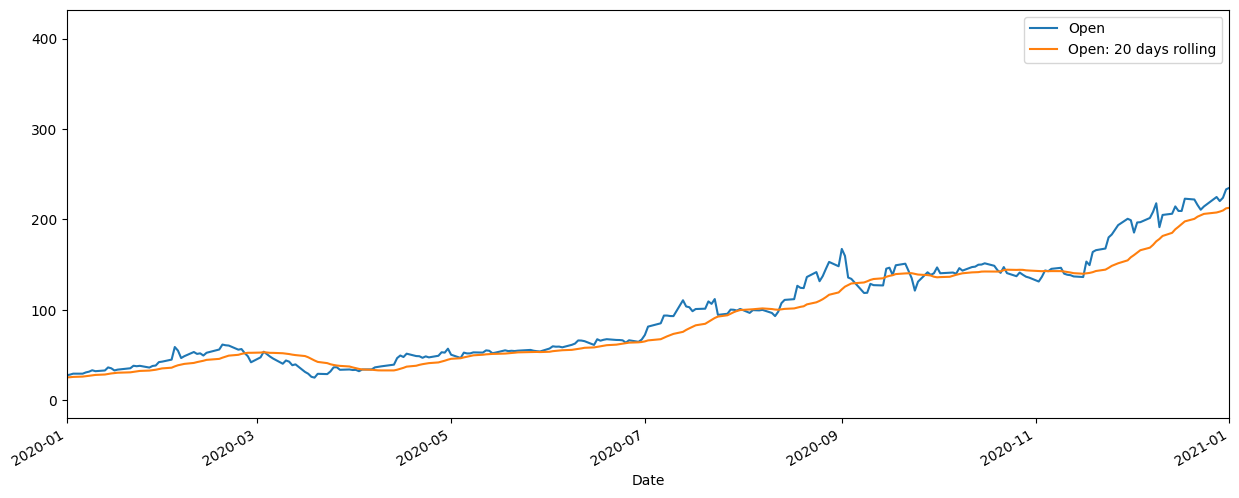

In [17]:
tsla_data[['Open','Open: 20 days rolling']].plot(xlim =['2020-01-01','2021-01-01'],figsize = (15,6))

<Axes: xlabel='Date'>

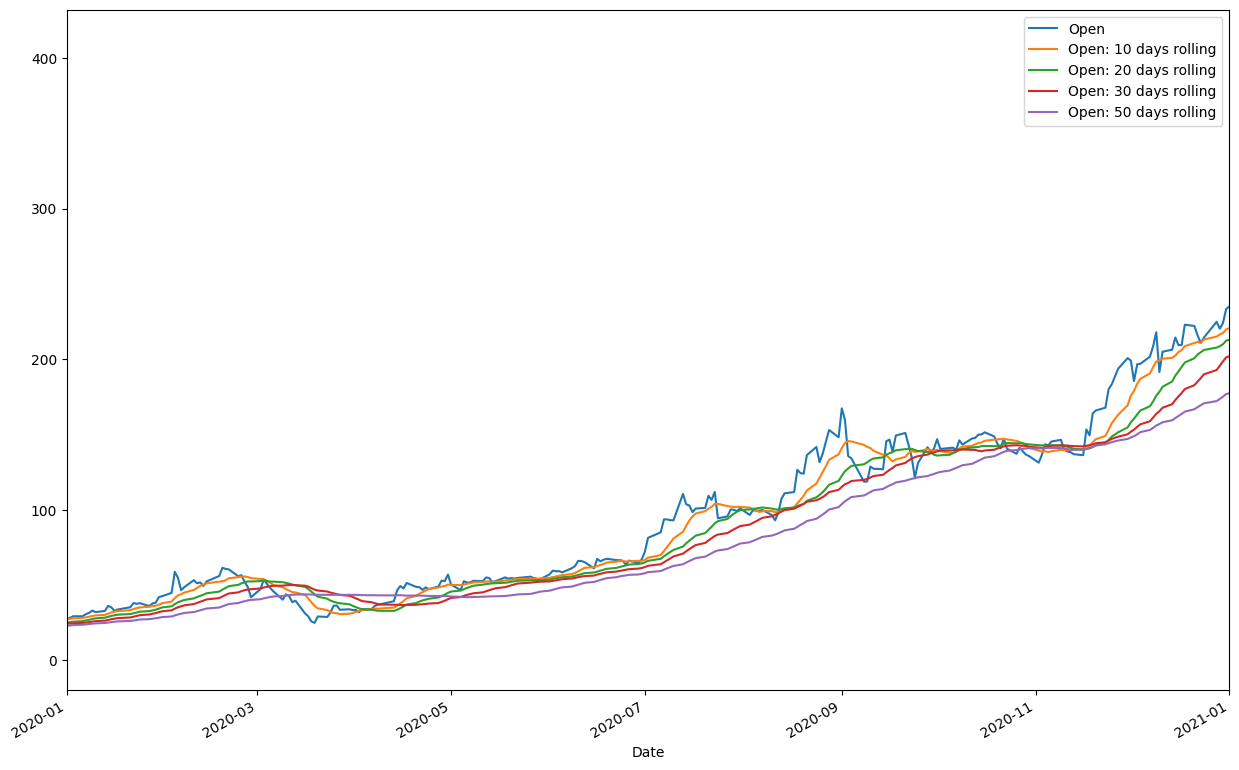

In [19]:
# now lets compare all the different rollings in one plot
tsla_data[['Open','Open: 10 days rolling','Open: 20 days rolling','Open: 30 days rolling','Open: 50 days rolling']].plot(xlim =['2020-01-01','2021-01-01'],figsize = (15,10))

#### disadvantages of simple moving average 

In [ ]:
# we are giving importance to all the data equally but in time series data we depend recent data alot ,so we have to give more weight to the recent data

<Axes: xlabel='Date'>

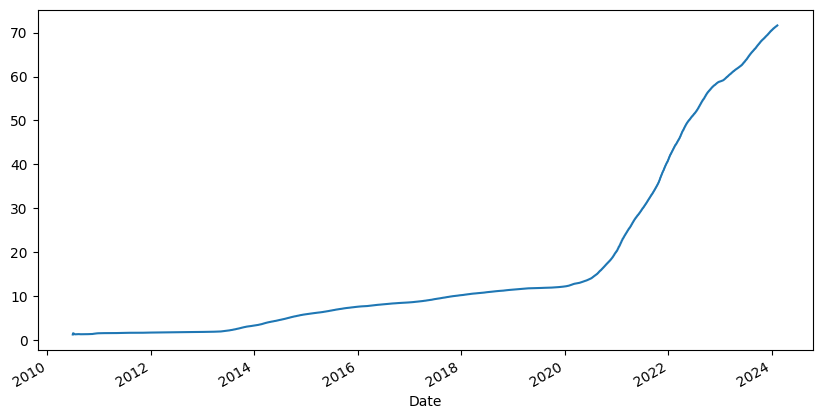

In [20]:
# cumulative moving average
tsla_data['Open'].expanding().mean().plot(figsize = (10,5))

In [22]:
# EWMA - Exponential weighted moving average
# the focus should be more on cureent data or recent data
# lets consider smoothing factor be 0.1
tsla_data['EMA_0.1'] = tsla_data['Open'].ewm(alpha = 0.1 , adjust = False).mean()

<Axes: xlabel='Date'>

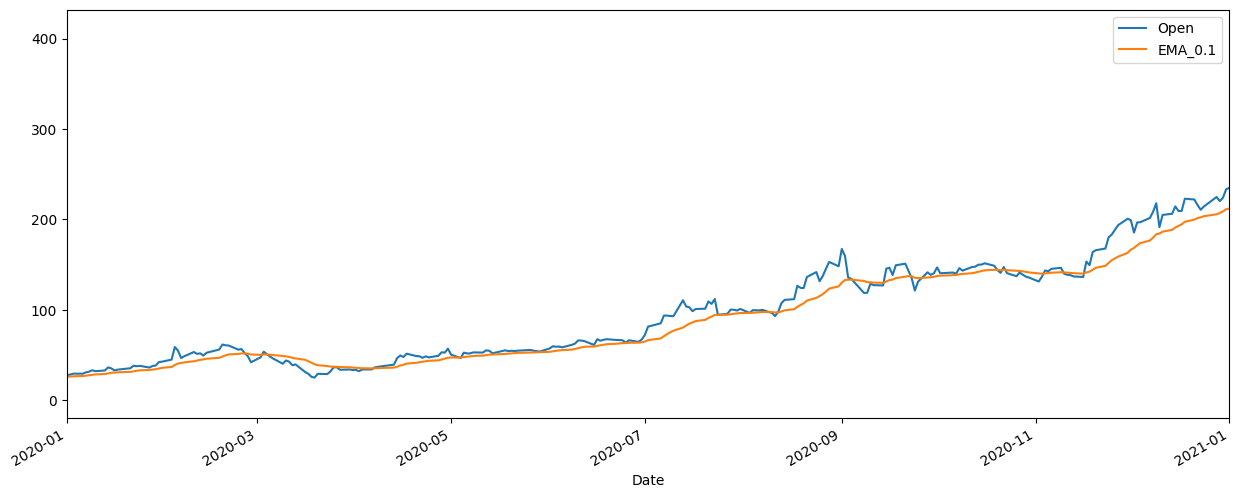

In [23]:
tsla_data[['Open','EMA_0.1']].plot(xlim =['2020-01-01','2021-01-01'],figsize = (15,6))

In [24]:
# changing smoothening parameter to 0.3
tsla_data['EMA_0.3'] = tsla_data['Open'].ewm(alpha = 0.3 , adjust = False).mean()

<Axes: xlabel='Date'>

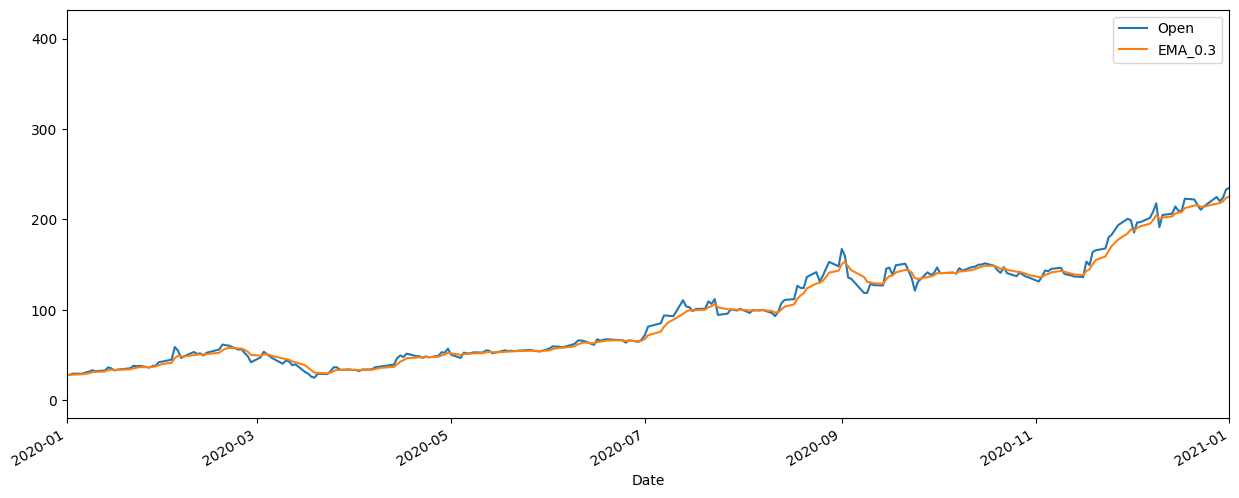

In [25]:
tsla_data[['Open','EMA_0.3']].plot(xlim =['2020-01-01','2021-01-01'],figsize = (15,6))

<Axes: xlabel='Date'>

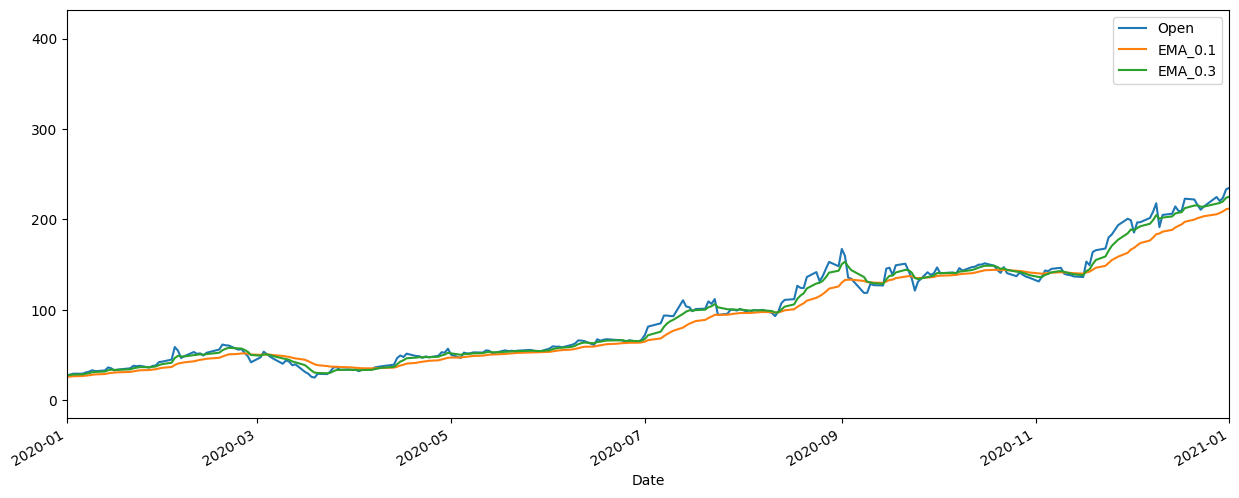

In [26]:
# comparing smoothness of the curves with smoothening values as 0.1 and 0.3
tsla_data[['Open','EMA_0.1','EMA_0.3']].plot(xlim =['2020-01-01','2021-01-01'],figsize = (15,6))

In [27]:
tsla_data['EMA_5_days'] = tsla_data['Open'].ewm(span = 5).mean()

<Axes: xlabel='Date'>

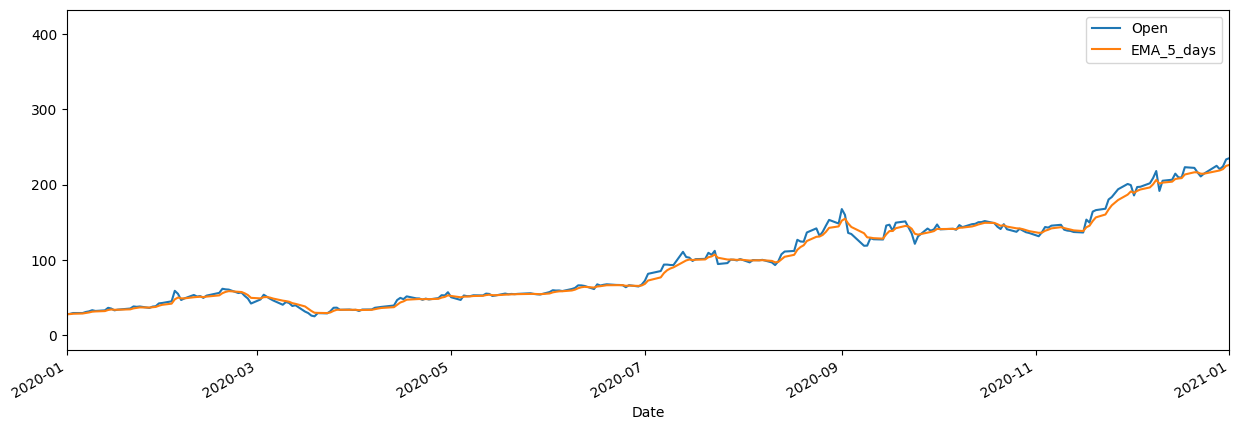

In [29]:
tsla_data[['Open','EMA_5_days']].plot(xlim =['2020-01-01','2021-01-01'],figsize = (15,5))